In [17]:
import pandas as pd
import numpy as np
import warnings
import time

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error
from sklearn.model_selection import train_test_split

from pmdarima.arima import auto_arima

warnings.filterwarnings('ignore')

In [47]:
# read datasets 
enc = pd.read_csv('../../data/regional_datasets/univariate/enc_data_univ.csv')
esc = pd.read_csv('../../data/regional_datasets/univariate/esc_data_univ.csv')
mid_atlantic = pd.read_csv('../../data/regional_datasets/univariate/mid_atlantic_data_univ.csv')
mountain = pd.read_csv('../../data/regional_datasets/univariate/mountain_data_univ.csv')
new_england = pd.read_csv('../../data/regional_datasets/univariate/new_england_data_univ.csv')
pacific = pd.read_csv('../../data/regional_datasets/univariate/pacific_data_univ.csv')
south_atlantic = pd.read_csv('../../data/regional_datasets/univariate/south_atlantic_data_univ.csv')
wnc = pd.read_csv('../../data/regional_datasets/univariate/wnc_data_univ.csv')
wsc = pd.read_csv('../../data/regional_datasets/univariate/wsc_data_univ.csv')

# ignore values before march 
enc = enc[enc.date >= "2020-03-01"]
esc = esc[esc.date >= "2020-03-01"]
mid_atlantic = mid_atlantic[mid_atlantic.date >= "2020-03-01"]
mountain = mountain[mountain.date >= "2020-03-01"]
new_england = new_england[new_england.date >= "2020-03-01"]
pacific = pacific[pacific.date >= "2020-03-01"]
south_atlantic = south_atlantic[south_atlantic.date >= "2020-03-01"]
wnc = wnc[wnc.date >= "2020-03-01"]
wsc = wsc[wsc.date >= "2020-03-01"]


datasets = [enc, esc, mid_atlantic, mountain, new_england, pacific, south_atlantic, wnc, wsc]
for df in datasets:
    df.set_index(pd.to_datetime(df['date']), inplace=True)
    df.drop(columns=["Unnamed: 0", "date"], axis=1, inplace=True)
    df.sort_index(inplace=True)


# AutoARIMA

Training model for East North Central...
17068.239927141236
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -8530.120
Date:                Mon, 11 Mar 2024   AIC                          17068.240
Time:                        22:43:04   BIC                          17086.841
Sample:                    01-22-2020   HQIC                         17075.397
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6927      0.011     63.252      0.000       0.671       0.714
ma.L1         -1.8073      0.008   -227.437      0.000      -1.823     

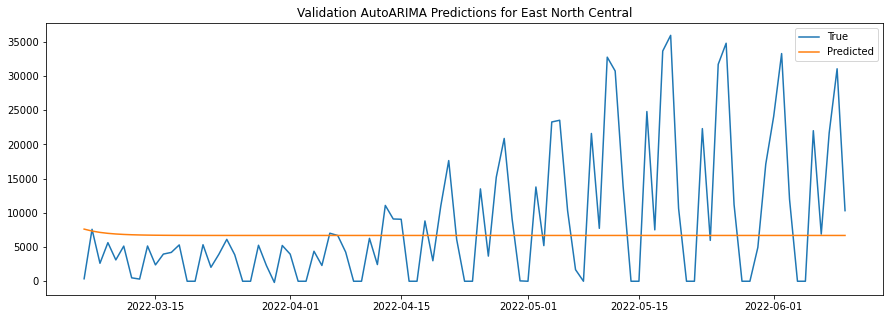


Training model for East South Central...
15567.687962550075
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -7775.844
Date:                Mon, 11 Mar 2024   AIC                          15567.688
Time:                        22:43:12   BIC                          15604.890
Sample:                    01-22-2020   HQIC                         15582.003
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1180      0.019      6.307      0.000       0.081       0.155
ar.L2         -0.5511      0.020    -27.029      0.000      -0.591    

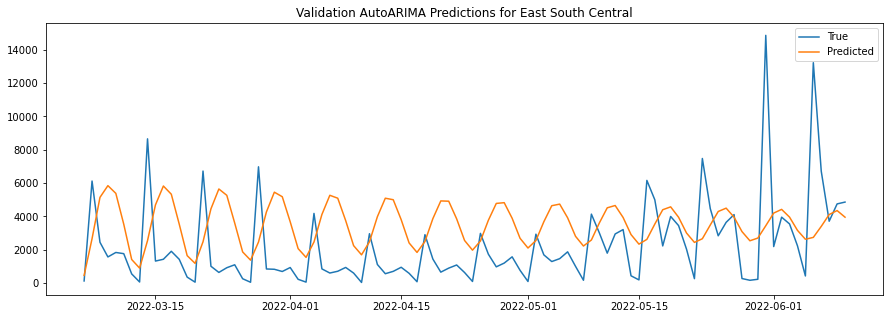


Training model for Mid-Atlantic...
15465.830742294653
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -7730.915
Date:                Mon, 11 Mar 2024   AIC                          15465.831
Time:                        22:43:13   BIC                          15475.131
Sample:                    01-22-2020   HQIC                         15469.409
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3266      0.007    -44.914      0.000      -0.341      -0.312
sigma2      2.851e+07   9.02e-11   3.16e+17      0.000    2.85e+07    2.85e+

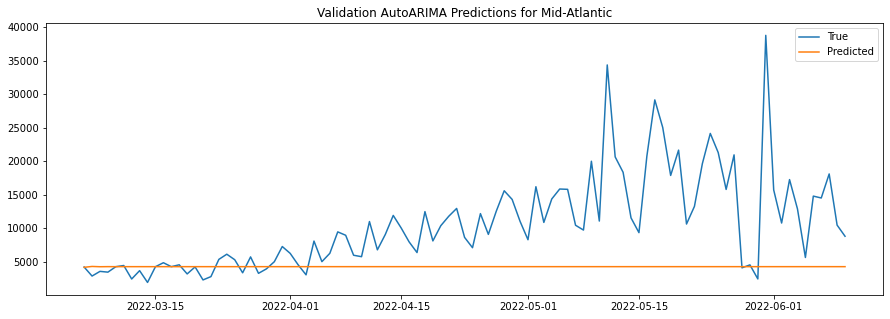


Training model for Mountain...
15812.411195420067
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -7901.206
Date:                Mon, 11 Mar 2024   AIC                          15812.411
Time:                        22:43:17   BIC                          15835.663
Sample:                    01-22-2020   HQIC                         15821.358
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7788      0.018     43.330      0.000       0.744       0.814
ar.L2         -0.2623      0.019    -13.716      0.000      -0.300      -0.225
m

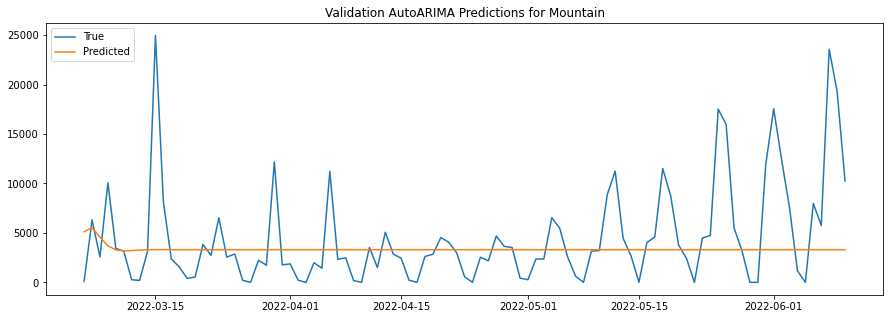


Training model for New England...
15556.258044120563
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -7772.129
Date:                Mon, 11 Mar 2024   AIC                          15556.258
Time:                        22:43:24   BIC                          15584.160
Sample:                    01-22-2020   HQIC                         15566.994
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2182      0.010    123.628      0.000       1.199       1.238
ar.L2         -0.8667      0.008   -105.955      0.000      -0.883      -0.85

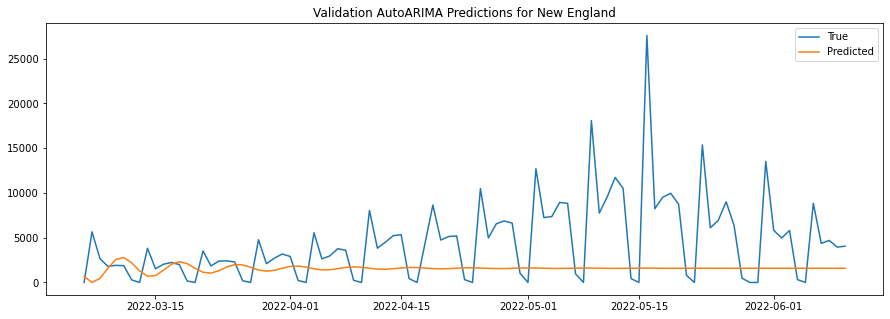


Training model for Pacific...
17240.72913183413
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -8615.365
Date:                Mon, 11 Mar 2024   AIC                          17240.729
Time:                        22:43:26   BIC                          17263.981
Sample:                    01-22-2020   HQIC                         17249.676
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0666      0.024     -2.744      0.006      -0.114      -0.019
ar.L2         -0.3245      0.016    -19.693      0.000      -0.357      -0.292
ar.

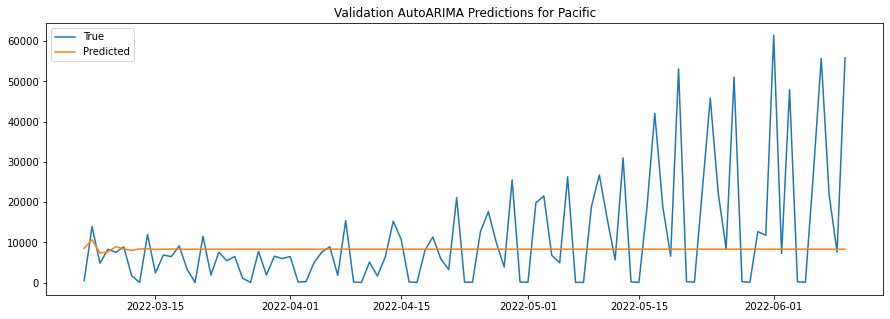


Training model for South Atlantic...
17568.866300321635
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -8778.433
Date:                Mon, 11 Mar 2024   AIC                          17568.866
Time:                        22:43:33   BIC                          17596.768
Sample:                    01-22-2020   HQIC                         17579.602
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1103      0.020     55.111      0.000       1.071       1.150
ar.L2         -0.6566      0.013    -48.929      0.000      -0.683      -0

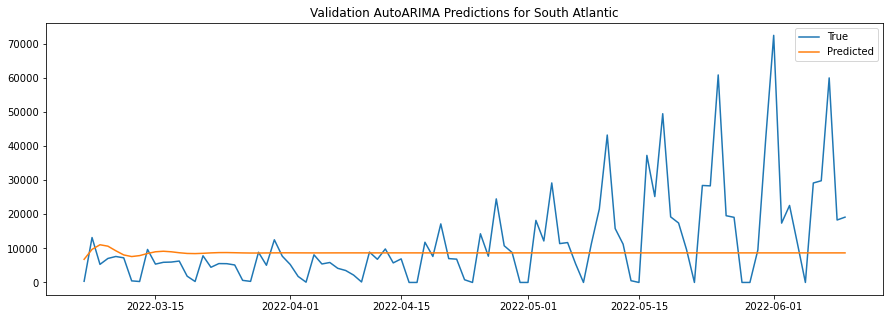


Training model for West North Central...
15494.579412497198
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -7739.290
Date:                Mon, 11 Mar 2024   AIC                          15494.579
Time:                        22:43:39   BIC                          15531.782
Sample:                    01-22-2020   HQIC                         15508.894
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3721      0.029     12.735      0.000       0.315       0.429
ar.L2         -0.5485      0.017    -31.521      0.000      -0.583    

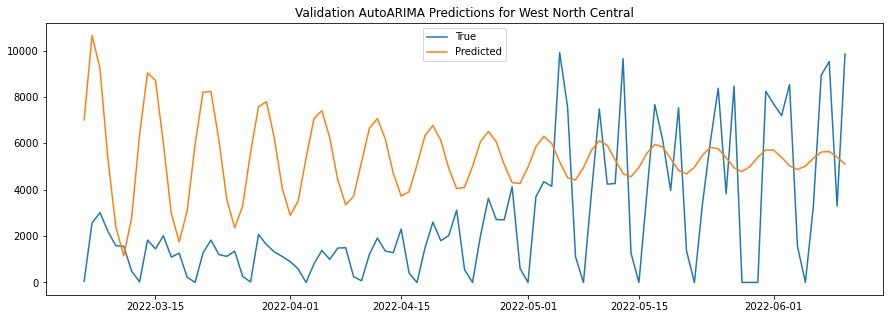


Training model for West South Central...
16421.229256320188
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -8205.615
Date:                Mon, 11 Mar 2024   AIC                          16421.229
Time:                        22:43:44   BIC                          16444.481
Sample:                    01-22-2020   HQIC                         16430.176
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0094      0.025     40.729      0.000       0.961       1.058
ar.L2         -0.2708      0.024    -11.228      0.000      -0.318    

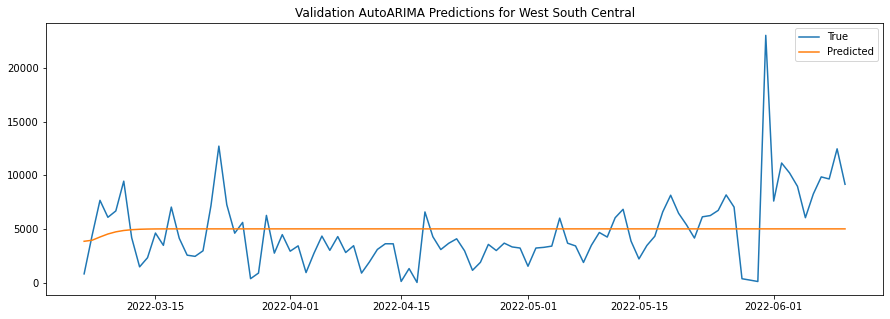

In [32]:
def baseline_auto_arima_valid(df, plot=False, m=7):
    try:
        region = df["region"].iloc[0]
        print(f"Training model for {region}...")

        train_df, temp_test_df = train_test_split(df, test_size=0.2, shuffle=False)
        val_df, test_df  = train_test_split(temp_test_df, test_size=0.5, shuffle=False)

        train = train_df['new_confirmed']
        # test = test_df['new_confirmed']
        val = val_df['new_confirmed']
        # train_val = pd.concat([train, val])

        model = auto_arima(train, seasonal=True, m=m, suppress_warnings=True, stepwise=True,)
        print(model.aic())
        print(model.summary())

        # pred, conf_int = model.predict(n_periods=size, return_conf_int=True)
        pred = model.predict(n_periods=int(len(val)))
        pred[pred < 0] = 0

        # calculate metrics
        mae = mean_absolute_error(val, pred)
        mse = mean_squared_error(val, pred)
        rmse = mean_squared_error(val, pred, squared=False)
        mase = mean_absolute_scaled_error(val, pred, y_train=train)

        print(f'MAE: {round(mae, 2)}')
        print(f'MSE: {round(mse, 2)}')
        print(f'RMSE: {round(rmse, 2)}')
        print(f'MASE: {round(mase, 2)}')

        # plot predictions
        if plot:
            plt.figure(figsize=(15, 5))
            plt.title(f'Validation AutoARIMA Predictions for {region}')
            plt.plot(val.index, val, label='True')
            plt.plot(pred.index, pred, label='Predicted')
            # uncomment to show confidence interval
            # plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')
            plt.legend() 
            plt.show()
    except Exception as e:
        print(e)

for df in datasets:
    baseline_auto_arima_valid(df, plot=True, m=1)
    print("")

Training model for East North Central...
16421.681455088958
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  774
Model:             SARIMAX(2, 1, 1)x(2, 0, [], 7)   Log Likelihood               -8204.841
Date:                            Mon, 11 Mar 2024   AIC                          16421.681
Time:                                    22:45:13   BIC                          16449.583
Sample:                                01-22-2020   HQIC                         16432.417
                                     - 03-05-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1117      0.016     -6.931      0.000

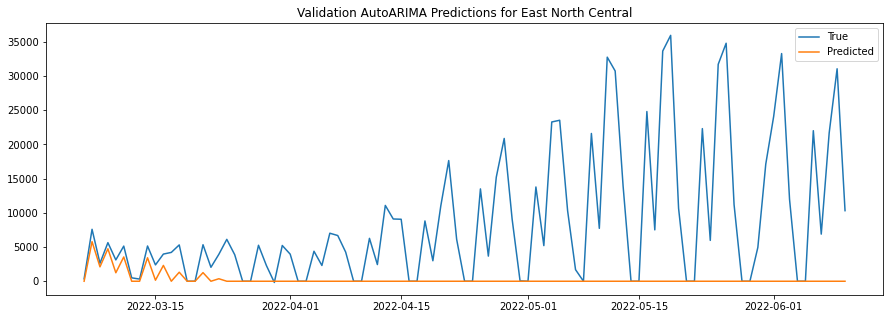


Training model for East South Central...
15552.39327284965
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  774
Model:             SARIMAX(5, 1, 2)x(2, 0, 2, 7)   Log Likelihood               -7763.197
Date:                           Mon, 11 Mar 2024   AIC                          15552.393
Time:                                   22:53:45   BIC                          15612.847
Sample:                               01-22-2020   HQIC                         15575.654
                                    - 03-05-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     23.1086     24.155      0.957      0.339     -24

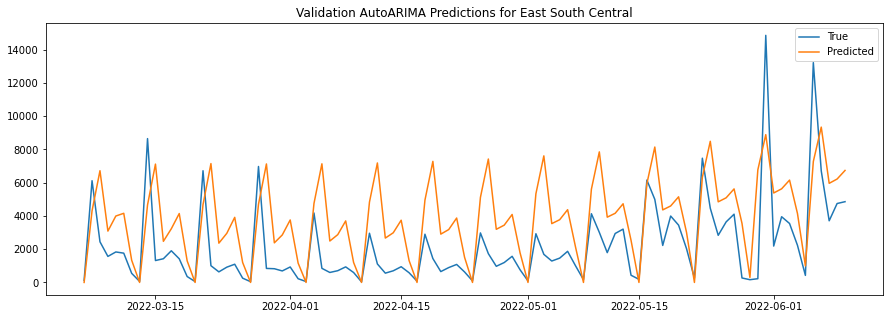


Training model for Mid-Atlantic...
15305.985954869113
                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  774
Model:             SARIMAX(1, 1, 0)x(2, 0, [1, 2], 7)   Log Likelihood               -7646.993
Date:                                Mon, 11 Mar 2024   AIC                          15305.986
Time:                                        22:55:06   BIC                          15333.888
Sample:                                    01-22-2020   HQIC                         15316.722
                                         - 03-05-2022                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4709      

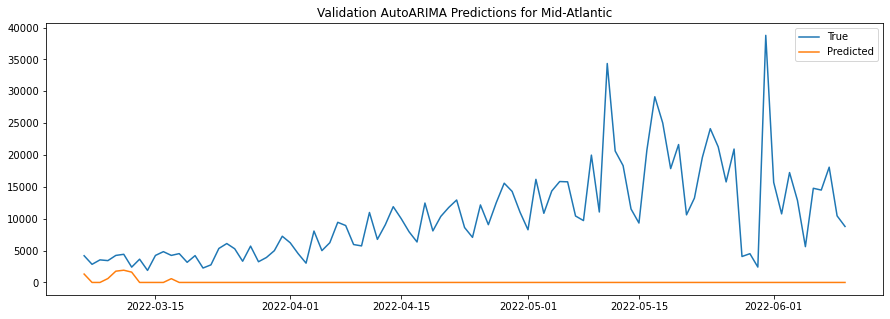


Training model for Mountain...
15558.423105459235
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  774
Model:             SARIMAX(5, 1, 5)x(1, 0, [1], 7)   Log Likelihood               -7766.212
Date:                             Mon, 11 Mar 2024   AIC                          15558.423
Time:                                     23:10:38   BIC                          15618.877
Sample:                                 01-22-2020   HQIC                         15581.684
                                      - 03-05-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2064      0.053      3.875      0.000 

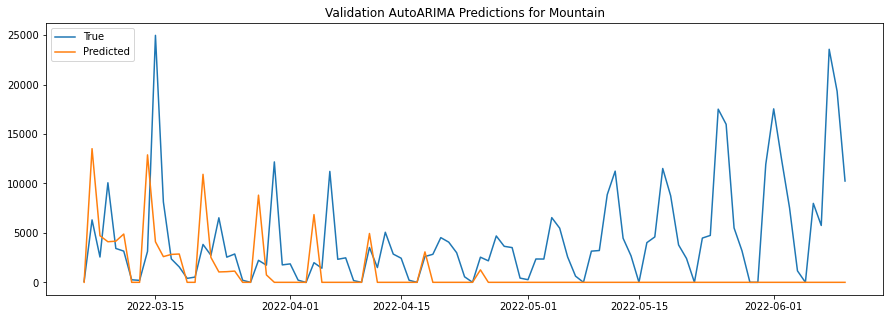


Training model for New England...
15361.374315199913
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  774
Model:             SARIMAX(2, 1, 1)x(2, 0, [], 7)   Log Likelihood               -7673.687
Date:                            Mon, 11 Mar 2024   AIC                          15361.374
Time:                                    23:11:05   BIC                          15393.926
Sample:                                01-22-2020   HQIC                         15373.900
                                     - 03-05-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -45.8931     80.130     -0.573      0.567    -2

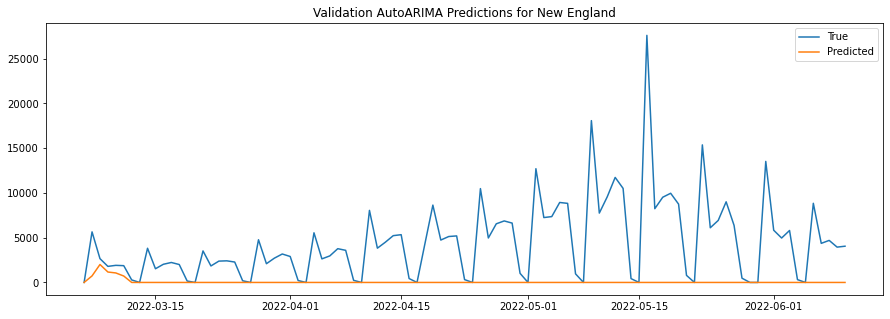


Training model for Pacific...
16625.759651803004
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  774
Model:             SARIMAX(4, 1, 2)x(2, 0, 2, 7)   Log Likelihood               -8300.880
Date:                           Mon, 11 Mar 2024   AIC                          16625.760
Time:                                   23:14:51   BIC                          16681.563
Sample:                               01-22-2020   HQIC                         16647.231
                                    - 03-05-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     56.1221     55.733      1.007      0.314     -53.112     1

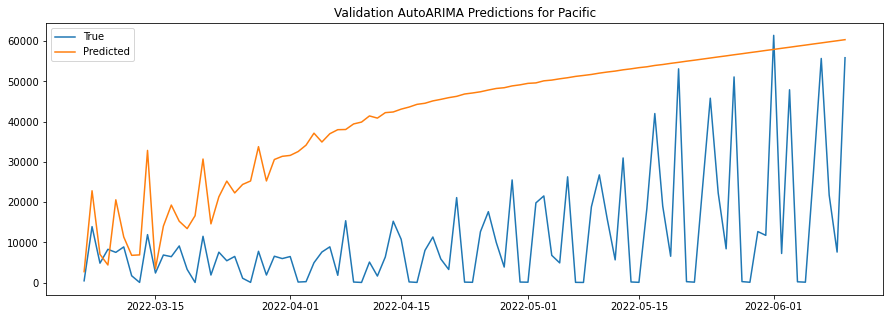


Training model for South Atlantic...
17348.967611861273
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  774
Model:             SARIMAX(5, 1, 2)x(1, 0, [], 7)   Log Likelihood               -8665.484
Date:                            Mon, 11 Mar 2024   AIC                          17348.968
Time:                                    23:22:31   BIC                          17390.820
Sample:                                01-22-2020   HQIC                         17365.071
                                     - 03-05-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7586      0.021    -82.877      0.000   

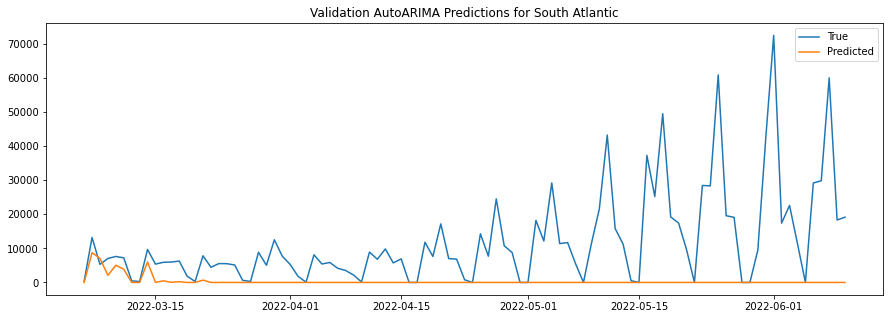


Training model for West North Central...
15370.577139540335
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  774
Model:             SARIMAX(4, 1, 2)x(2, 0, [1], 7)   Log Likelihood               -7675.289
Date:                             Mon, 11 Mar 2024   AIC                          15370.577
Time:                                     23:33:12   BIC                          15417.080
Sample:                                 01-22-2020   HQIC                         15388.470
                                      - 03-05-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7547      0.056     13.385  

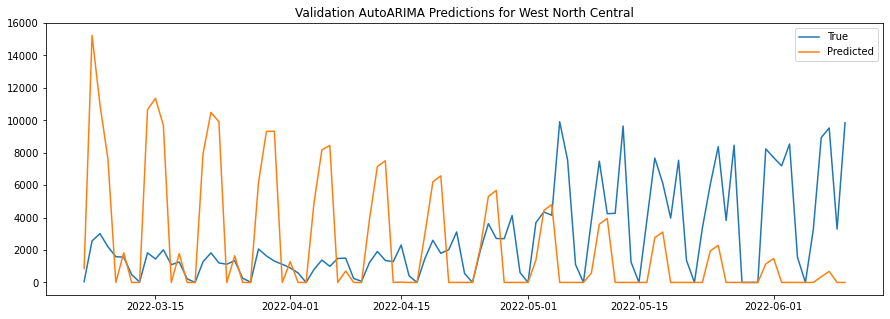


Training model for West South Central...
16264.636083820693
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  774
Model:             SARIMAX(2, 1, 2)x(1, 0, [], 7)   Log Likelihood               -8126.318
Date:                            Mon, 11 Mar 2024   AIC                          16264.636
Time:                                    23:35:42   BIC                          16292.538
Sample:                                01-22-2020   HQIC                         16275.372
                                     - 03-05-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0502      0.034     30.845      0.00

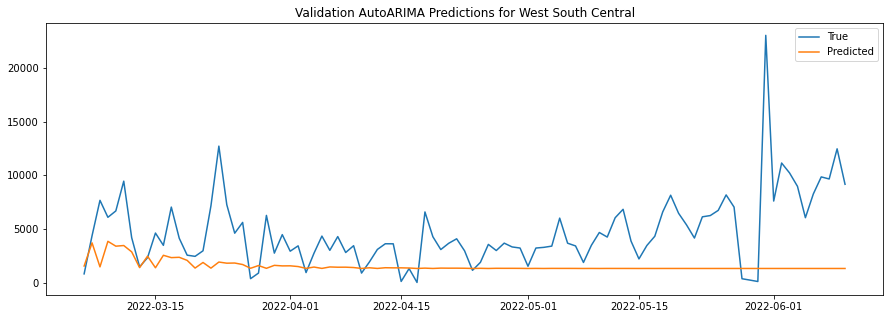

In [33]:
for df in datasets:
    baseline_auto_arima_valid(df, plot=True, m=7)
    print("")

Training model for East North Central...
16407.641202219034
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(7, 1, 5)   Log Likelihood               -8190.821
Date:                Tue, 12 Mar 2024   AIC                          16407.641
Time:                        10:39:16   BIC                          16468.095
Sample:                    01-22-2020   HQIC                         16430.902
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0214      0.026     -0.819      0.413      -0.073       0.030
ar.L2         -0.0028      0.027     -0.103      0.918      -0.056     

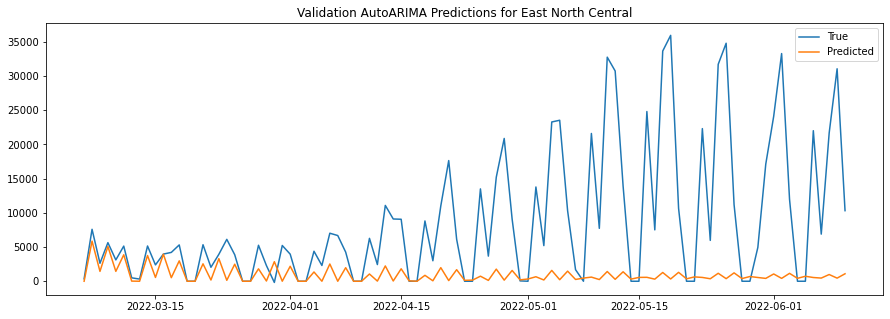


Training model for East South Central...
15520.324118427317
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(7, 1, 7)   Log Likelihood               -7745.162
Date:                Tue, 12 Mar 2024   AIC                          15520.324
Time:                        10:39:54   BIC                          15590.078
Sample:                    01-22-2020   HQIC                         15547.164
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0826      0.073      1.127      0.260      -0.061       0.226
ar.L2         -0.1738      0.055     -3.156      0.002      -0.282    

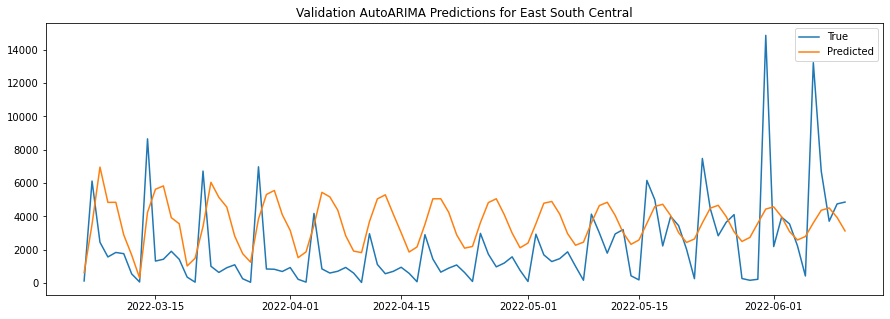


Training model for Mid-Atlantic...
15233.615453011244
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(3, 1, 5)   Log Likelihood               -7607.808
Date:                Tue, 12 Mar 2024   AIC                          15233.615
Time:                        10:40:57   BIC                          15275.468
Sample:                    01-22-2020   HQIC                         15249.719
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0341      0.027     76.367      0.000       1.982       2.086
ar.L2         -1.9333      0.034    -56.157      0.000      -2.001      -1.8

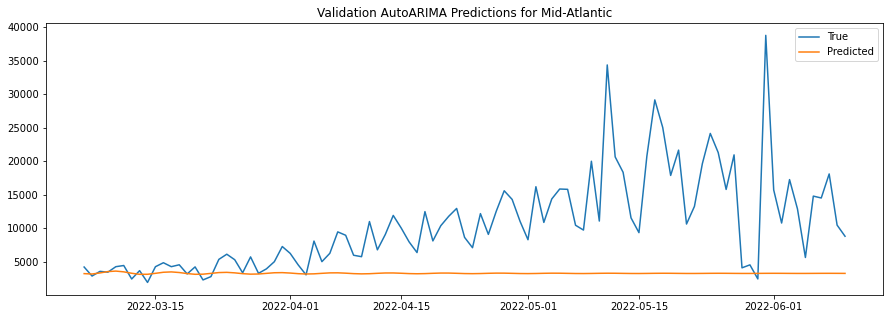


Training model for Mountain...
15552.978665968727
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(6, 1, 6)   Log Likelihood               -7763.489
Date:                Tue, 12 Mar 2024   AIC                          15552.979
Time:                        10:47:19   BIC                          15613.432
Sample:                    01-22-2020   HQIC                         15576.240
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2956      0.057     22.914      0.000       1.185       1.406
ar.L2         -1.4964      0.074    -20.289      0.000      -1.641      -1.352
a

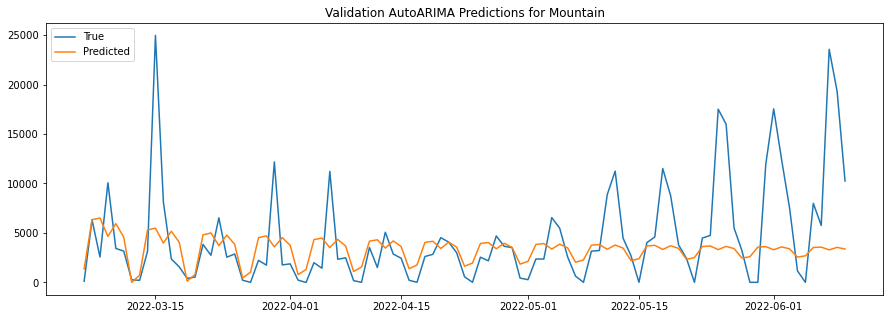


Training model for New England...
15271.262016099125
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(7, 1, 6)   Log Likelihood               -7621.631
Date:                Tue, 12 Mar 2024   AIC                          15271.262
Time:                        10:48:13   BIC                          15336.366
Sample:                    01-22-2020   HQIC                         15296.312
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3344      0.107      3.133      0.002       0.125       0.544
ar.L2         -1.2273      0.057    -21.477      0.000      -1.339      -1.11

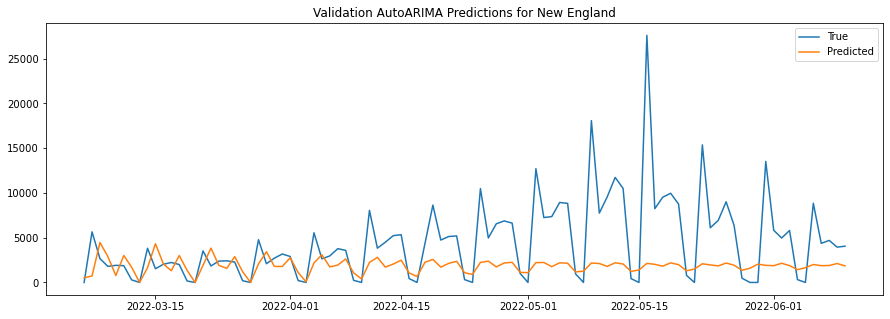


Training model for Pacific...
16625.71473181785
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(7, 1, 7)   Log Likelihood               -8297.857
Date:                Tue, 12 Mar 2024   AIC                          16625.715
Time:                        10:48:54   BIC                          16695.469
Sample:                    01-22-2020   HQIC                         16652.554
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0115      0.032      0.357      0.721      -0.052       0.075
ar.L2         -0.0294      0.033     -0.881      0.378      -0.095       0.036
ar.

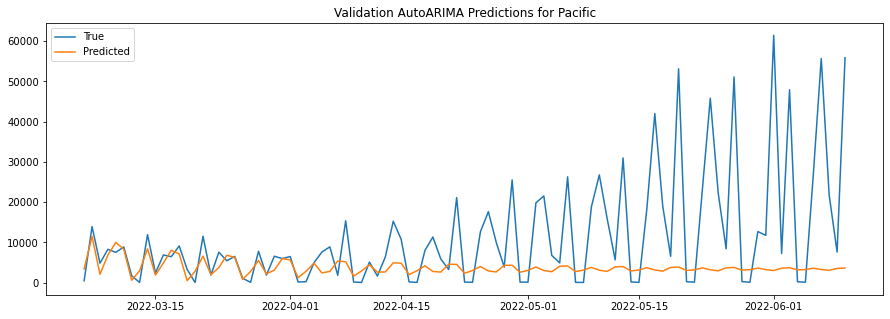


Training model for South Atlantic...
17328.68635006192
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(7, 1, 7)   Log Likelihood               -8649.343
Date:                Tue, 12 Mar 2024   AIC                          17328.686
Time:                        10:49:37   BIC                          17398.441
Sample:                    01-22-2020   HQIC                         17355.526
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2748      0.024    -52.798      0.000      -1.322      -1.227
ar.L2         -1.6014      0.034    -47.648      0.000      -1.667      -1.

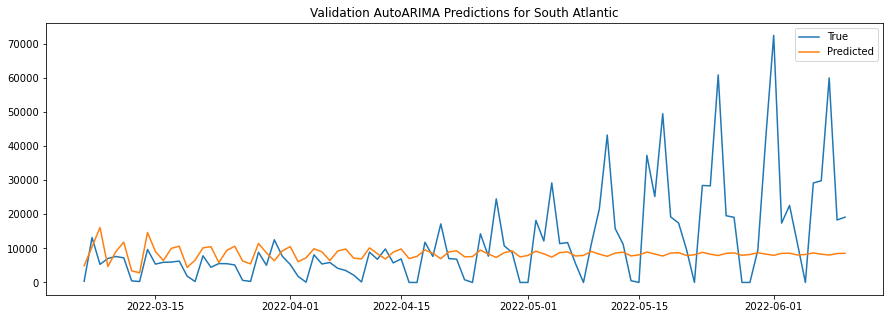


Training model for West North Central...
15391.136594853639
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(6, 1, 6)   Log Likelihood               -7682.568
Date:                Tue, 12 Mar 2024   AIC                          15391.137
Time:                        10:50:45   BIC                          15451.590
Sample:                    01-22-2020   HQIC                         15414.398
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8878      0.028    -31.340      0.000      -0.943      -0.832
ar.L2         -0.6808      0.036    -18.848      0.000      -0.752    

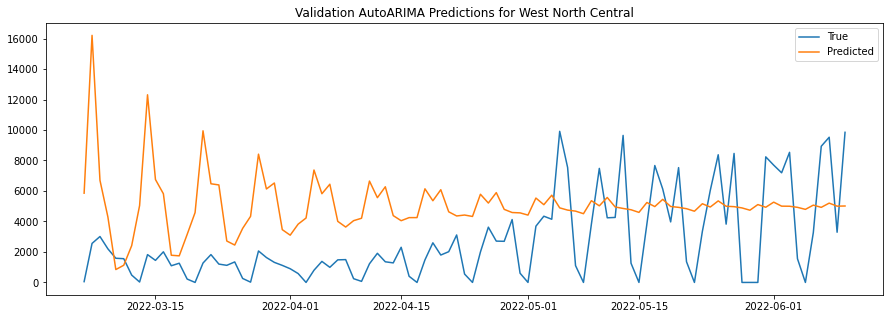


Training model for West South Central...
16353.292910563703
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  774
Model:               SARIMAX(3, 1, 5)   Log Likelihood               -8167.646
Date:                Tue, 12 Mar 2024   AIC                          16353.293
Time:                        10:51:11   BIC                          16395.145
Sample:                    01-22-2020   HQIC                         16369.397
                         - 03-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0453      0.041    -25.587      0.000      -1.125      -0.965
ar.L2          0.1995      0.049      4.041      0.000       0.103    

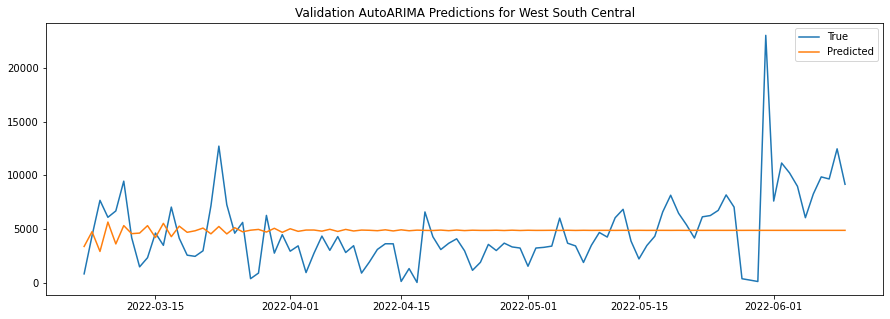

In [37]:
def baseline_auto_arima_valid_nonseasonal(df, plot=False):
    try:
        region = df["region"].iloc[0]
        print(f"Training model for {region}...")

        train_df, temp_test_df = train_test_split(df, test_size=0.2, shuffle=False)
        val_df, test_df  = train_test_split(temp_test_df, test_size=0.5, shuffle=False)

        train = train_df['new_confirmed']
        # test = test_df['new_confirmed']
        val = val_df['new_confirmed']
        # train_val = pd.concat([train, val])

        model = auto_arima(train, suppress_warnings=True, stepwise=True,
                           max_p=7, max_q=7, start_p=5, start_q=5)
        print(model.aic())
        print(model.summary())

        # pred, conf_int = model.predict(n_periods=size, return_conf_int=True)
        pred = model.predict(n_periods=int(len(val)))
        pred[pred < 0] = 0

        # calculate metrics
        mae = mean_absolute_error(val, pred)
        mse = mean_squared_error(val, pred)
        rmse = mean_squared_error(val, pred, squared=False)
        mase = mean_absolute_scaled_error(val, pred, y_train=train)

        print(f'MAE: {round(mae, 2)}')
        print(f'MSE: {round(mse, 2)}')
        print(f'RMSE: {round(rmse, 2)}')
        print(f'MASE: {round(mase, 2)}')

        # plot predictions
        if plot:
            plt.figure(figsize=(15, 5))
            plt.title(f'Validation AutoARIMA Predictions for {region}')
            plt.plot(val.index, val, label='True')
            plt.plot(pred.index, pred, label='Predicted')
            # uncomment to show confidence interval
            # plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')
            plt.legend() 
            plt.show()
    except Exception as e:
        print(e)

for df in datasets:
    baseline_auto_arima_valid_nonseasonal(df, plot=True)
    print("")

## Final Auto Arima

In [38]:
orders = {
    "East North Central": (1, 1, 2),
    "East South Central": (5, 1, 2),
    "Mid-Atlantic": (1, 1, 0),
    "Mountain": (6, 1, 6),  
    "New England": (7, 1, 6),
    "Pacific": (7, 1, 7),
    "South Atlantic": (7, 1, 7),
    "West North Central": (4, 1, 2),
    "West South Central": (3, 1, 5),
}
seasonal_orders = {
    "East North Central": None,
    "East South Central": (2, 0, 2, 7),
    "Mid-Atlantic": None,
    "Mountain": None,
    "New England": None,
    "Pacific": None,
    "South Atlantic": None,
    "West North Central": (2, 0, [1], 7),
    "West South Central": None,
}

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def final_auto_arima(df, plot=False, order=None, seasonal_order=None):
    try:
        region = df["region"].iloc[0]
        print(f"Training model for {region}...")

        train_df, temp_test_df = train_test_split(df, test_size=0.2, shuffle=False)
        val_df, test_df  = train_test_split(temp_test_df, test_size=0.5, shuffle=False)

        train = train_df['new_confirmed']
        test = test_df['new_confirmed']
        val = val_df['new_confirmed']
        train_val = pd.concat([train, val])

        # model = auto_arima(train_val, seasonal=True, m=m, suppress_warnings=True, stepwise=True,)
        # print(model.aic())
        # print(model.summary())

        # pred, conf_int = model.predict(n_periods=size, return_conf_int=True)
        if not seasonal_order:
            model = SARIMAX(train_val, order=order)
        else:
            model = SARIMAX(train_val, order=order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)

        pred = model_fit.forecast(steps=int(len(test)))
        pred[pred < 0] = 0

        # calculate metrics
        mae = mean_absolute_error(test, pred)
        # mse = mean_squared_error(test, pred)
        rmse = mean_squared_error(test, pred, squared=False)
        mase = mean_absolute_scaled_error(test, pred, y_train=train_val)

        print(f'MAE: {round(mae, 2)}')
        # print(f'MSE: {round(mse, 2)}')
        print(f'RMSE: {round(rmse, 2)}')
        print(f'MASE: {round(mase, 2)}')

        # plot predictions
        if plot:
            plt.figure(figsize=(15, 5))
            plt.title(f'AutoARIMA Predictions for {region}')
            plt.plot(test.index, test, label='True')
            plt.plot(pred.index, pred, label='Predicted')
            # uncomment to show confidence interval
            # plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')
            plt.legend() 

            plt.savefig(f"plots/{region}_autoarima.png")
            plt.show()
        return region, mase, rmse, mae
    except Exception as e:
        print(e)

Training model for East North Central...
MAE: 10522.22
RMSE: 12331.87
MASE: 1.23


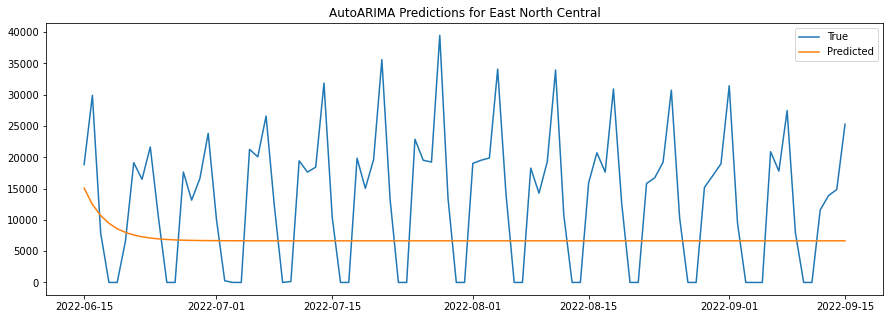


Training model for East South Central...
MAE: 5154.14
RMSE: 6307.05
MASE: 1.5


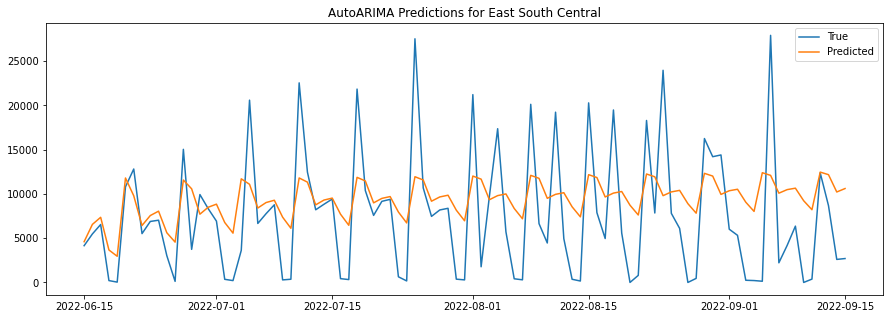


Training model for Mid-Atlantic...
MAE: 5869.76
RMSE: 6736.37
MASE: 2.36


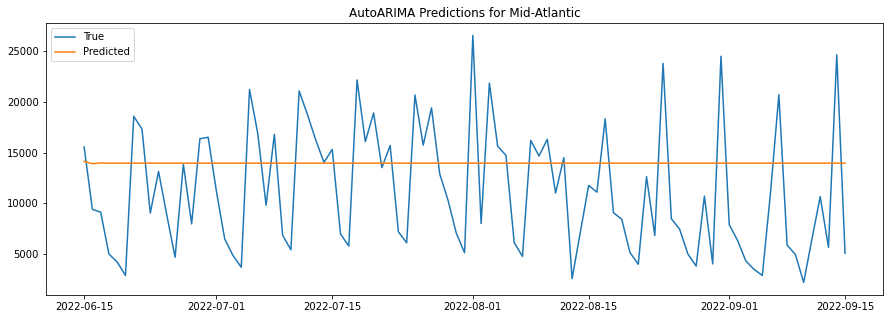


Training model for Mountain...
MAE: 6802.06
RMSE: 7858.13
MASE: 2.03


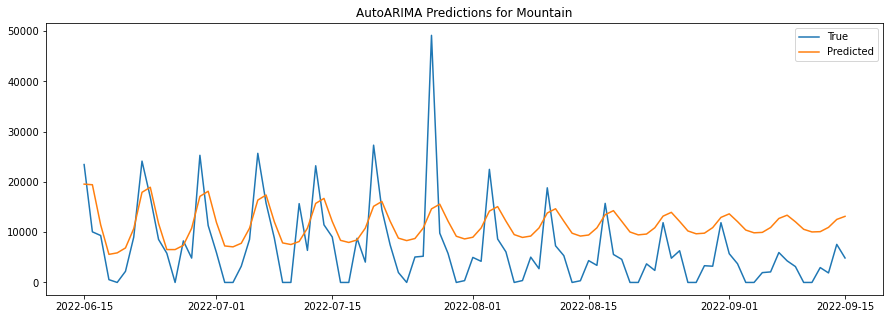


Training model for New England...
MAE: 2326.01
RMSE: 3256.04
MASE: 0.84


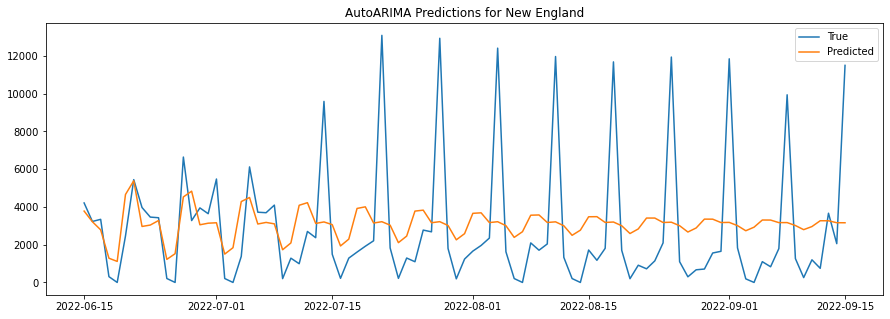


Training model for Pacific...
MAE: 12790.67
RMSE: 15416.17
MASE: 1.62


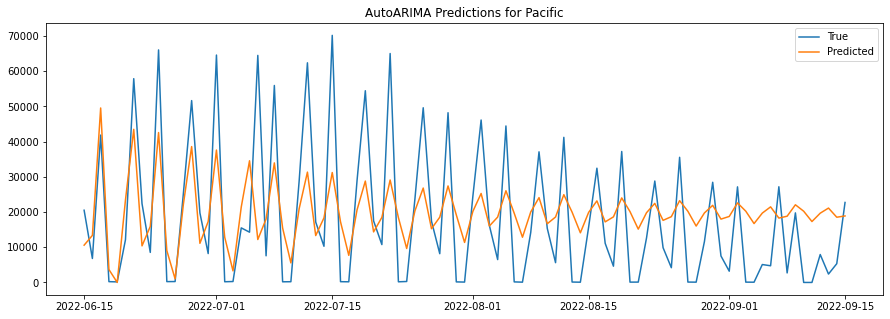


Training model for South Atlantic...
MAE: 15855.96
RMSE: 21517.11
MASE: 1.42


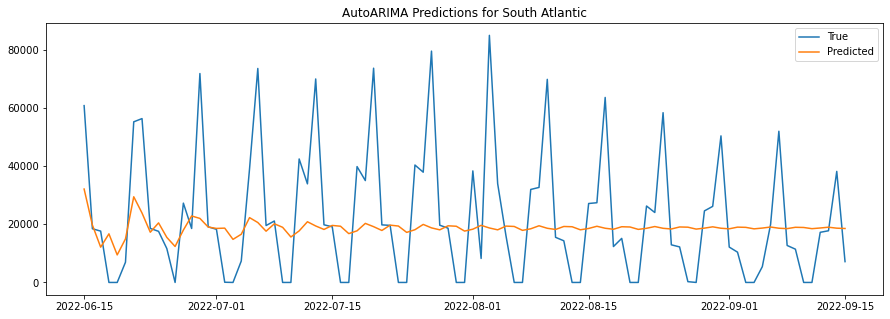


Training model for West North Central...
MAE: 2957.73
RMSE: 4054.03
MASE: 0.9


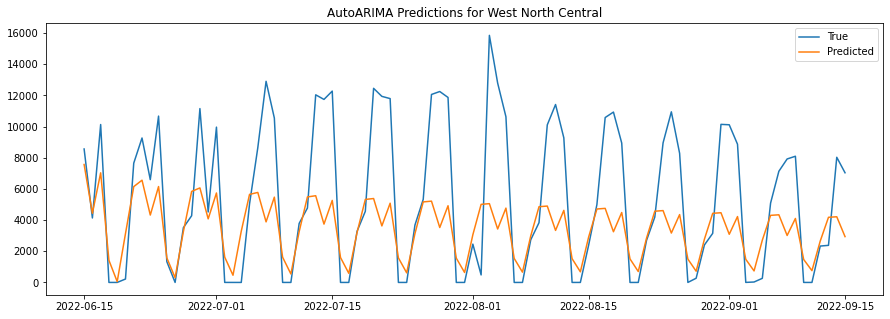


Training model for West South Central...
MAE: 8508.65
RMSE: 10456.53
MASE: 1.9


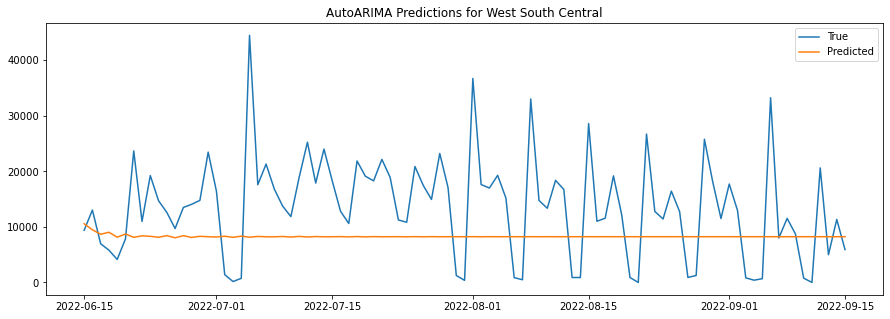

,Region,MASE,RMSE,MAE
0,East North Central,1.232088,12331.872044,10522.221741
1,East South Central,1.504495,6307.051550,5154.141889
2,Mid-Atlantic,2.360583,6736.368749,5869.756859
3,Mountain,2.033303,7858.130846,6802.064420
4,New England,0.843433,3256.039068,2326.012106
5,Pacific,1.620498,15416.169376,12790.673753
6,South Atlantic,1.418272,21517.112321,15855.955006
7,West North Central,0.903025,4054.032237,2957.727830
8,West South Central,1.897017,10456.527430,8508.645736


In [49]:
stats = []
for df in datasets:
    region, mase, rmse, mae = final_auto_arima(df, plot=True, order=orders[df["region"].iloc[0]], seasonal_order=seasonal_orders[df["region"].iloc[0]])
    stats.append([region, mase, rmse, mae])
    print("")
results = pd.DataFrame(stats, columns=["Region", "MASE", "RMSE", "MAE"])
results